In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.neighbors import NearestNeighbors

In [15]:
# Step 1: Data Collection
# You can use the Spotify API to get audio features. Make sure to set up your credentials.
df = pd.read_csv('SpotifyFeatures.csv.zip', encoding='utf-8')
df

genre               artist_name                        track_name  \
0       Movie            Henri Salvador       C'est beau de faire un Show   
1       Movie         Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2       Movie           Joseph Williams    Don't Let Me Be Lonely Tonight   
3       Movie            Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4       Movie              Fabien Nataf                         Ouverture   
...       ...                       ...                               ...   
232720   Soul                     Slave                      Son Of Slide   
232721   Soul  Jr Thomas & The Volcanos                      Burning Fire   
232722   Soul              Muddy Waters    (I'm Your) Hoochie Coochie Man   
232723   Soul                   R.LUM.R                     With My Words   
232724   Soul            Mint Condition    You Don't Have To Hurt No More   

                      track_id  popularity  acousticness  danceability  \
0       0BRjO6ga9RKCKjfDqeFgWV           0       0.61100         0.389   
1       0BjC1NfoEOOusryehmNudP           1       0.24600         0.590   
2       0CoSDzoNIKCRs124s9uTVy           3       0.95200         0.663   
3       0Gc6TVm52BwZD07Ki6tIvf           0       0.70300         0.240   
4       0IuslXpMROHdEPvSl1fTQK           4       0.95000         0.331   
...                        ...         ...           ...           ...   
232720  2XGLdVl7lGeq8ksM6Al7jT          39       0.00384         0.687   
232721  1qWZdkBl4UVPj9lK6HuuFM          38       0.03290         0.785   
232722  2ziWXUmQLrXTiYjCg2fZ2t          47       0.90100         0.517   
232723  6EFsue2YbIG4Qkq8Zr9Rir          44       0.26200         0.745   
232724  34XO9RwPMKjbvRry54QzWn          35       0.09730         0.758   

        duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0             99373   0.910          0.000000  C#    0.3460    -1.828  Major   
1            137373   0.737          0.000000  F#    0.1510    -5.559  Minor   
2            170267   0.131          0.000000   C    0.1030   -13.879  Minor   
3            152427   0.326          0.000000  C#    0.0985   -12.178  Major   
4             82625   0.225          0.123000   F    0.2020   -21.150  Major   
...             ...     ...               ...  ..       ...       ...    ...   
232720       326240   0.714          0.544000   D    0.0845   -10.626  Major   
232721       282447   0.683          0.000880   E    0.2370    -6.944  Minor   
232722       166960   0.419          0.000000   D    0.0945    -8.282  Major   
232723       222442   0.704          0.000000   A    0.3330    -7.137  Major   
232724       323027   0.470          0.000049  G#    0.0836    -6.708  Minor   

        speechiness    tempo time_signature  valence  
0            0.0525  166.969            4/4    0.814  
1            0.0868  174.003            4/4    0.816  
2            0.0362   99.488            5/4    0.368  
3            0.0395  171.758            4/4    0.227  
4            0.0456  140.576            4/4    0.390  
...             ...      ...            ...      ...  
232720       0.0316  115.542            4/4    0.962  
232721       0.0337  113.830            4/4    0.969  
232722       0.1480   84.135            4/4    0.813  
232723       0.1460  100.031            4/4    0.489  
232724       0.0287  113.897            4/4    0.479  

[232725 rows x 18 columns]

In [16]:
#data preprocessing
df.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [17]:
df = df.dropna()

In [18]:
df.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [19]:
#duplicate check
df=df.drop_duplicates()

In [20]:
df1 = df.drop(['genre','artist_name','track_name','track_id','key','time_signature'],axis=1)

In [21]:
#data preprocessing
import numpy as np
df1.loc[df1["mode"] == "Major" ,"mode"] = 1
df1.loc[df1["mode"] == "Minor" ,"mode"] = 0
x = np.array(df1)
x

array([[0, 0.611, 0.389, ..., 0.0525, 166.969, 0.814],
       [1, 0.246, 0.59, ..., 0.0868, 174.003, 0.816],
       [3, 0.952, 0.663, ..., 0.0362, 99.488, 0.368],
       ...,
       [47, 0.901, 0.517, ..., 0.148, 84.135, 0.813],
       [44, 0.262, 0.745, ..., 0.146, 100.031, 0.489],
       [35, 0.0973, 0.758, ..., 0.0287, 113.897, 0.479]], dtype=object)

In [22]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

/Users/deepikachintala/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/deepikachintala/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/deepikachintala/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/deepikachintala/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The defa

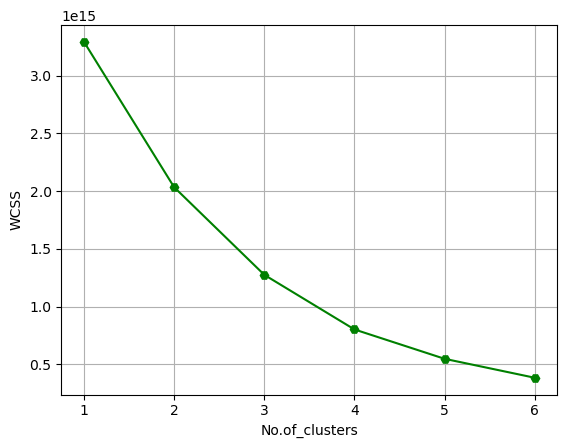

In [23]:
plt.figure(dpi = 100)
plt.plot(np.arange(1,7),wcss,marker = "H",color = "g")
plt.xlabel("No.of_clusters")
plt.ylabel("WCSS")

plt.grid()
plt.show()

In [24]:
df1

popularity  acousticness  danceability  duration_ms  energy  \
0                0       0.61100         0.389        99373   0.910   
1                1       0.24600         0.590       137373   0.737   
2                3       0.95200         0.663       170267   0.131   
3                0       0.70300         0.240       152427   0.326   
4                4       0.95000         0.331        82625   0.225   
...            ...           ...           ...          ...     ...   
232720          39       0.00384         0.687       326240   0.714   
232721          38       0.03290         0.785       282447   0.683   
232722          47       0.90100         0.517       166960   0.419   
232723          44       0.26200         0.745       222442   0.704   
232724          35       0.09730         0.758       323027   0.470   

        instrumentalness  liveness  loudness mode  speechiness    tempo  \
0               0.000000    0.3460    -1.828    1       0.0525  166.969   
1               0.000000    0.1510    -5.559    0       0.0868  174.003   
2               0.000000    0.1030   -13.879    0       0.0362   99.488   
3               0.000000    0.0985   -12.178    1       0.0395  171.758   
4               0.123000    0.2020   -21.150    1       0.0456  140.576   
...                  ...       ...       ...  ...          ...      ...   
232720          0.544000    0.0845   -10.626    1       0.0316  115.542   
232721          0.000880    0.2370    -6.944    0       0.0337  113.830   
232722          0.000000    0.0945    -8.282    1       0.1480   84.135   
232723          0.000000    0.3330    -7.137    1       0.1460  100.031   
232724          0.000049    0.0836    -6.708    0       0.0287  113.897   

        valence  
0         0.814  
1         0.816  
2         0.368  
3         0.227  
4         0.390  
...         ...  
232720    0.962  
232721    0.969  
232722    0.813  
232723    0.489  
232724    0.479  

[232725 rows x 12 columns]

/var/folders/4s/w6szcmh9007b24wvd1kds_n00000gn/T/ipykernel_20766/4244545028.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


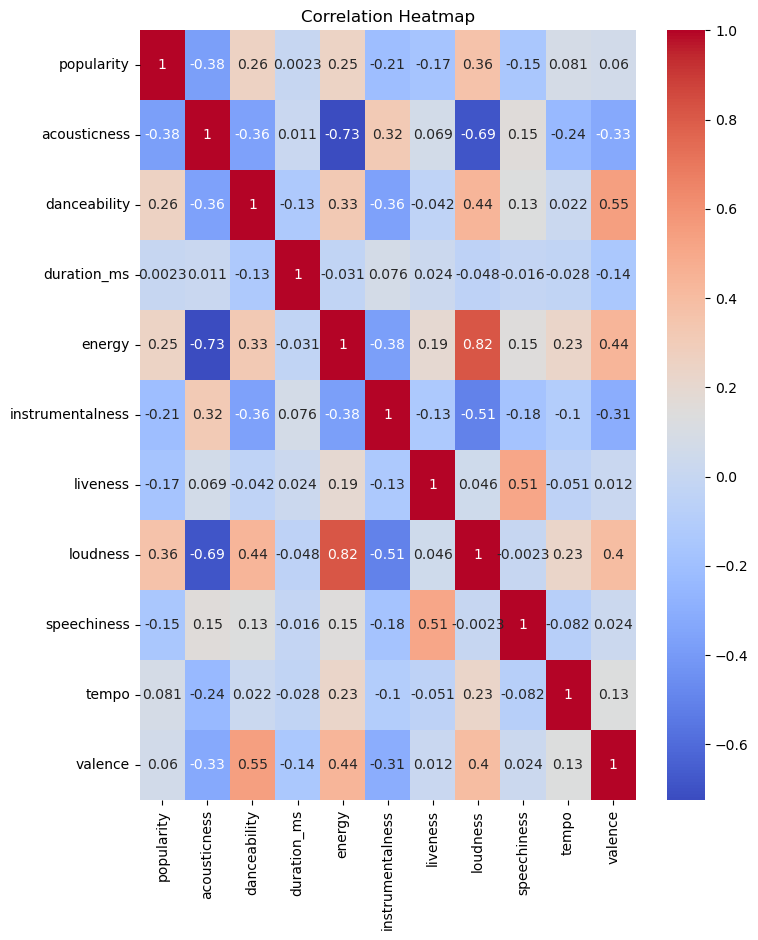

In [25]:
plt.figure(figsize=(8,10))
correlation_matrix = df1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [26]:
df2  = df1[['danceability','valence','energy','loudness']]

In [27]:
# Step 5: Clustering
# Assuming 'features' contains the selected features
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df2)

/Users/deepikachintala/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [28]:
# Step 6: Playlist Creation
# Add cluster information to the original dataset
df['cluster'] = clusters

In [29]:
playlists = {}
for cluster_id in range(3):  # Change to the actual number of clusters
    cluster_info = df[df['cluster'] == cluster_id][['track_name', 'track_id']]
    playlists[f'Playlist {cluster_id + 1}'] = cluster_info.to_dict(orient='records')

In [30]:
playlists

{'Playlist 1': [{'track_name': 'Ouverture',
   'track_id': '0IuslXpMROHdEPvSl1fTQK'},
  {'track_name': 'The Hanging (Maverick - Original Motion Picture Score) - Remastered',
   'track_id': '0hprxsuRM5vVCOfaM7l3gQ'},
  {'track_name': 'Comme minuit sonnait', 'track_id': '16UTNMhXjeJa8IG9uBijxZ'},
  {'track_name': 'Bourrée, From English Suite No. 2, BWV 807',
   'track_id': '1ppTRhpfunYl8Jd3Hfckee'},
  {'track_name': "L'Âne chargé d'éponges et l'Âne chargé de sel",
   'track_id': '2BF5SlaZRL0sYUDBgwjmbo'},
  {'track_name': 'Rialto - From "La La Land" Score',
   'track_id': '2BcLdx9G6GF32IWlvb1UGa'},
  {'track_name': 'Jack To The Rescue - Meet The Parents/Soundtrack',
   'track_id': '2I5Vq5yS1xuh9lk0mZ2oMS'},
  {'track_name': 'I Denne Søte Juletid: Kom La Oss Gå Og Se!',
   'track_id': '3kO00CU9Y6u8pIbk2Oi2j4'},
  {'track_name': 'Chorale for Snow White - From "Snow White and the Seven Dwarfs"/Score',
   'track_id': '4LY0T9z0Nm1fZZrbBJX0pj'},
  {'track_name': 'The Pros Go To College',
   't

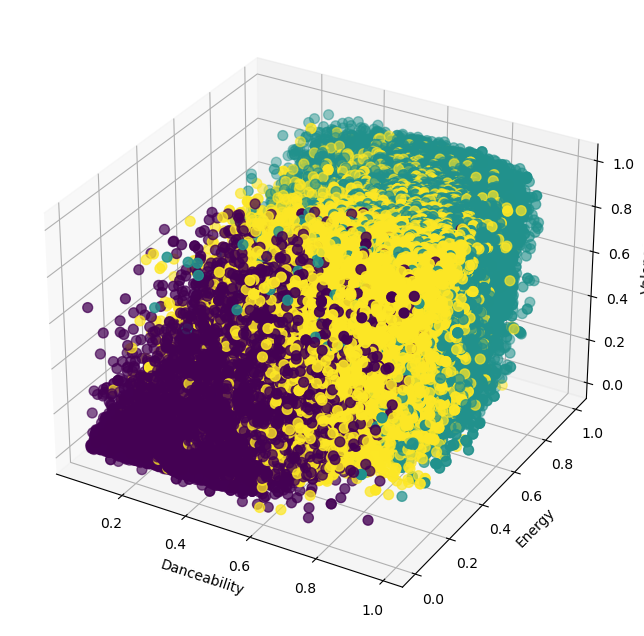

In [31]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['danceability'], df['energy'], df['valence'], c=clusters, cmap='viridis', s=50)
ax.set_xlabel('Danceability')
ax.set_ylabel('Energy')
ax.set_zlabel('Valence')
plt.show()


In [32]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df1)

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

In [34]:
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

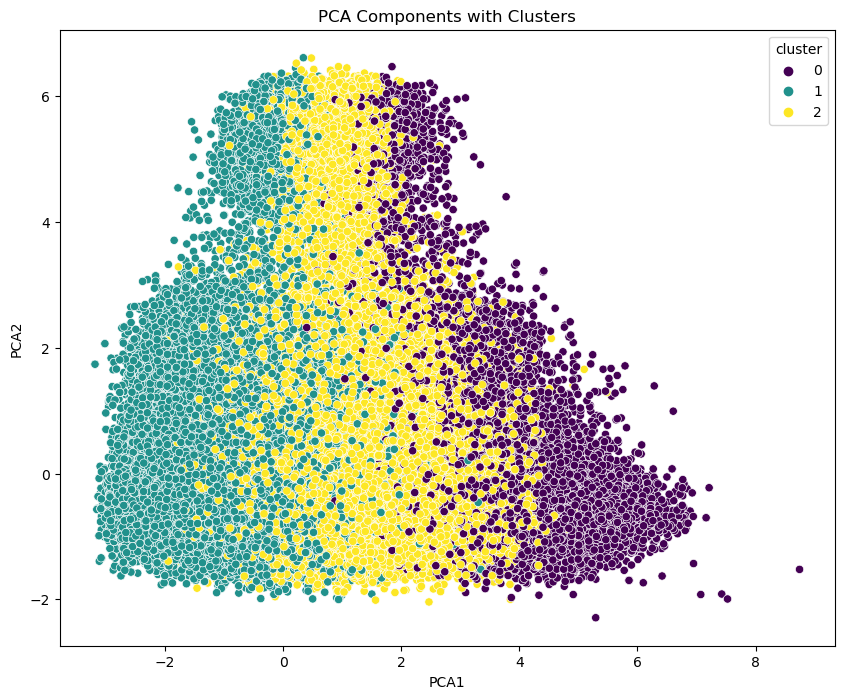

In [35]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=df, palette='viridis')
plt.title('PCA Components with Clusters')
plt.show()

## Model 2 : DBScan

In [36]:
from sklearn.cluster import DBSCAN

In [37]:
scaler = StandardScaler()
scaled_features1 = scaler.fit_transform(df2)

In [38]:
scaled_features1 = scaled_features1.round(2)

In [39]:
dbscan = DBSCAN(eps=0.8, min_samples=10)
clusters1 = dbscan.fit_predict(scaled_features1)

In [40]:
df['cluster'] = clusters1

In [41]:
unique_clusters = np.unique(clusters1)
playlists = {}


In [42]:
for cluster_id in unique_clusters:
    if cluster_id == -1:
        # Noise points (outliers) will be treated separately or ignored
        continue

In [43]:
cluster_info = df[df['cluster'] == cluster_id].groupby('track_id').first().reset_index()


In [44]:
cluster_info = df[df['cluster'] == cluster_id][['track_name', 'track_id']]
playlists[f'Playlist {cluster_id + 1}'] = cluster_info.to_dict(orient='records')

In [45]:
for playlist_name, track_list in playlists.items():
    print(f'{playlist_name}:')
    for track in track_list:
        print(f"  {track['track_name']} ({track['track_id']})")
    print('\n')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [46]:
playlist_name

'Playlist 1'

In [47]:
num_playlists = len(playlists)

In [48]:

num_playlists

1

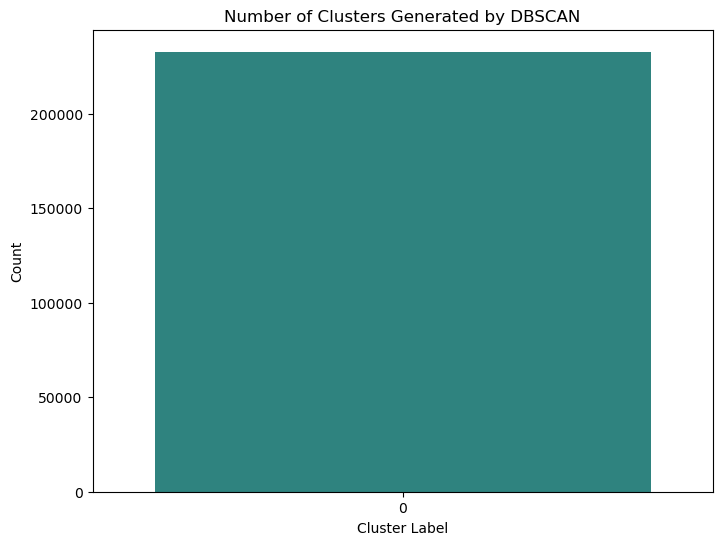

In [49]:
plt.figure(figsize=(8, 6))
sns.countplot(x='cluster', data=df[df['cluster'] != -1], palette='viridis')
plt.title('Number of Clusters Generated by DBSCAN')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.show()

In [50]:
clusters1

array([0, 0, 0, ..., 0, 0, 0])

In [51]:
unique_clusters

array([-1,  0])

In [52]:
cluster_info

track_name                track_id
0            C'est beau de faire un Show  0BRjO6ga9RKCKjfDqeFgWV
1       Perdu d'avance (par Gad Elmaleh)  0BjC1NfoEOOusryehmNudP
2         Don't Let Me Be Lonely Tonight  0CoSDzoNIKCRs124s9uTVy
3         Dis-moi Monsieur Gordon Cooper  0Gc6TVm52BwZD07Ki6tIvf
4                              Ouverture  0IuslXpMROHdEPvSl1fTQK
...                                  ...                     ...
232720                      Son Of Slide  2XGLdVl7lGeq8ksM6Al7jT
232721                      Burning Fire  1qWZdkBl4UVPj9lK6HuuFM
232722    (I'm Your) Hoochie Coochie Man  2ziWXUmQLrXTiYjCg2fZ2t
232723                     With My Words  6EFsue2YbIG4Qkq8Zr9Rir
232724    You Don't Have To Hurt No More  34XO9RwPMKjbvRry54QzWn

[232717 rows x 2 columns]

In [53]:
for cluster_id in unique_clusters:
    if cluster_id == -1:
        print(f'Noise (Outliers):')
    else:
        cluster_info = df[df['cluster'] == cluster_id][['track_name', 'track_id']]
        print(f'Cluster {cluster_id}:')

    for _, track_info in cluster_info.iterrows():
        print(f"  {track_info['track_name']} ({track_info['track_id']})")

    print('\n')


Noise (Outliers):
  C'est beau de faire un Show (0BRjO6ga9RKCKjfDqeFgWV)
  Perdu d'avance (par Gad Elmaleh) (0BjC1NfoEOOusryehmNudP)
  Don't Let Me Be Lonely Tonight (0CoSDzoNIKCRs124s9uTVy)
  Dis-moi Monsieur Gordon Cooper (0Gc6TVm52BwZD07Ki6tIvf)
  Ouverture (0IuslXpMROHdEPvSl1fTQK)
  Le petit souper aux chandelles (0Mf1jKa8eNAf1a4PwTbizj)
  Premières recherches (par Paul Ventimila, Lorie Pester, Véronique Jannot, Michèle Laroque & Gérard Lenorman) (0NUiKYRd6jt1LKMYGkUdnZ)
  Let Me Let Go (0PbIF9YVD505GutwotpB5C)
  Helka (0ST6uPfvaPpJLtQwhE6KfC)
  Les bisous des bisounours (0VSqZ3KStsjcfERGdcWpFO)
  Symphony No.4 In E Minor Op.98 : IV. Allegro Energico E Passionato (0XKgegoxLcIihK3Klpfo3N)
  The Hanging (Maverick - Original Motion Picture Score) - Remastered (0hprxsuRM5vVCOfaM7l3gQ)
  J'ai demandé à la lune (0jF6HUm18fg6QQCLHhfhC0)
  Mangala Aarti (0jIY0oRAp1T4mezDyEhOad)
  Keys of Love (0pXwl2CRP5awxHsF9eET3L)
  Les aventures d'Arsène Lupin: 813 - Partie 6 (0uWUjxM7oDPKpb3T2y3oZm)
 

  Giant Squiddim - Graphyt & Ecraze Remix (4eAraXT7fbfdhkdgAGAqSq)
  Don't Wait (1x6fQ08Smj58AYlSchDMVV)
  Youth (K?D Remix) [feat. Satica] (22POpFdpHAwCQLvgVuCS6R)
  View2 (6HCn0ohVORAZO3re1RpPyY)
  Dreams (6gsqy8gFLe65VVKqFeGRkB)
  Memories (2oD8x1fEyuglgsbytkBhWI)
  Are You Even Real (1ViUxXTr0hwA3QbuupXP0B)
  1542 (10glJ8ARN1G9ESFF9s00yk)
  Subterranean (0GwwMRnIuHV7h5qCXLEZIg)
  GTFU (1GWrza1nbj5BKjM6xdAu5x)
  Nuclear - Dillon Francis Remix (3TRBkcG10SFqd1S1c3oTWX)
  Bring It Back (5e11FHSG6Tfo9mO10MLe7C)
  Blaze Away (4QRdgb658a1ILXogewjAi8)
  I'll Give You The World (feat. JVMIE) (556lWiz4SCD6pJL4rjGCKD)
  Cold Skin - MiTiS Remix (22szgJ9WufVHgefSgOD6Dv)
  Yeahboi! (5P4s55ubmOnRPKPoyoJfP5)
  Sleepless (1ThCcviPScFjGBKRmoF1YE)
  Come Near Me (3O8xUedPNWuAGrX5Pd9ezJ)
  Flying Saucer (7r15UlSY5nIXujfgLGhwLA)
  Eleven (0WPX6mCPa4AWA83kanPze5)
  Origin (3Vp6XRtv4dylJYjsX7PJfe)
  Take It There (1CC61C089FcwSclobYtE94)
  The Black Brad Pitt (6hpUqttHuTM815VfGdSR6L)
  All In My Head (fe

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



  Whatcha Gonna Do? (6SMR0XI8a1D6gEpMTIju2y)
  As Long as You Love Me (2vLHinYk689HDnLkrsCZGF)
  Too Young to Burn (2wygBuUWMXrQujBBlwhDCL)
  Truckin' - 2001 Remaster (7cer0SfbnGwmwJGu6lF2BB)
  All That I Ask (37kFjQMS2T30LtzvXJQwCn)
  Time To Move On (20dt11ZTAtjsfcNJLP9u30)
  Plans (1svJlQzq22Erm3P87wGYgk)
  Carolina In My Mind (2Fv3LSqbgv5lrdClrc6XKc)
  Loves Me Like a Rock (7oH43GUMu7wCKoFZMWhosG)
  The Guitar (6rdsM3l1UWdlWZYUB5Jgxq)
  Right Place Wrong Time (0I2ELF6uHlL4ABu9aFiou7)
  Oviedo (2yO3BEZZBBYjcspaSD8wEj)
  Everyone But Me (6HXVfqCX59m3aygsRsbLL5)
  Broken Finger Blues (0O2WHAJUeYcElqNz8g2Q1V)
  Blue Moon (4gNErDjikE9QUQvkkqoB1S)
  Sugaree (2rKVo2Gl8CrLlFxMu40zCX)
  Little Green (11ZNWD9Xzq9p3n07NbWSZw)
  Best I'll Ever Sing (37a0RMpwwQjgIkLoEePwXa)
  Across the Universe (6ZQgooEk8PvsLxedYaT6Oa)
  Upward Over the Mountain (3SJzHTQOaMY0SxoEKLW2Z5)
  Ten Thousand Words (0MGMZ1413F9obd1qt4vkhy)
  Without Me (58fhd4lGAudPcnfY9oenp1)
  The Comedown (4FMRToryd5E6dwGPh0hA26)
 

  Laid (4GiLKZ6Fd3d5UMJMGuzAA0)
  Hurt Less (02vKLqcImboupwm6S8TXiC)
  White Christmas (0Xi9LfrVI0yu0WS3P0mXUE)
  Summer Wine (7zmVAVcT1oho7iWJGpApkE)
  Cruel (2dQ1H8MijOvXWrbTccH3IW)
  Midnight on the Interstate (4SI6ia4b6L5J1n6k42WeHC)
  Our Hearts Are Wrong (6Wf0dbrqvBkEUSe12cRsps)
  All the Things... (1HK419vcF6FfVzorQ6e1kb)
  Avalon (6u0ccx1pJICbSwCPMFCd1b)
  How Can You Really (2bbRXduStlyFlvAdPnMgic)
  the peaks - feat. kimberly anne (295JI7Vhf9XuV94uEgCc4s)
  Glamour Profession (3Q2Xxc7y6g4OrYmO53J7Yf)
  Baby, I'm an Anarchist! (0uSwAqfR6cBDj5BRP6L3Vx)
  I Want To Come Over (7tOEXhPdFosbBcQrAISAfl)
  Kid - 2006 Remaster (3UAmMPmXGMn28YRQkgS4tz)
  How Long Must I Wait (4P7nsPjk38M2UP1FsLuV3V)
  Angry Eyes - Single Version (1zM8E87IuR1CN968LCnNeQ)
  Fake Palindromes (50woGYhAqV3KXvO1LG4zLg)
  Boys from Tralee (6t23HcXPF392rw2DQZ1oCH)
  Stop Your Crying (7Ldu7lQEFNDLNN5llGXLcL)
  Say Goodbye to Hollywood (3YNFRvI0WnbvFdxUCQiKjR)
  I Don't Want to Lose You (4F2OxwQFkM7rFhwuz4akT9)


  Mass in C Major, "Messe breve No. 7 aux chapelles": Gloria: Quoniam tu solus Sanctus (0x69Qn8kTU1qGueqCPrdFf)
  Cendrillon: Faites-vous très belles (12b6JymxH4RgljmSqnbeBk)
  Rigoletto, Act I: Già da tre lune son qui venuta (13MhJOYI73qrj19nxZifLK)
  I vespri siciliani / Act 5: Merci, jeunes amies (1DbwzMsA7O9Ngxicvb8pY1)
  Lohengrin, Act III: Prelude (1N5X0W11goDl1LCd9RNXHL)
  Puccini: Tosca - Dammi I colori…Recondita armonia (1X30TzNoOGxVMZjIGTwLjI)
  Rigoletto, Act I: Act I: Prelude (1bERwCXBzWEbH1aH8GKW0B)
  Falstaff, Act I, Scene Two: Alice...Meg...Nannetta (Meg/Alice/Quickly/Nannetta) (1oVdRf0Y52h8eNRmQ4UMK0)
  Variations chromatiques (1rqUDcuR6s6hzxiQwzY19I)
  Puccini: Gianni Schicchi - O mio babbino caro (1yo7JvKnzMbcvlD7zR6sII)
  Götterdämmerung Funeral Music (1z1z9Vt9lBboNQFUVq7gZH)
  Nabucco / Act 1: Guerrieri, è preso il Tempio! ...Prode guerrier! (22KWVg60WQHei21XWMn9ce)
  Anfonaf Angel (260fITSX5hf7qDmzKjnJpP)
  Lakmé: Blumenduett (Lara Croft Tomb Raider): Lakme, Act I:

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [54]:
df

genre               artist_name                        track_name  \
0       Movie            Henri Salvador       C'est beau de faire un Show   
1       Movie         Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2       Movie           Joseph Williams    Don't Let Me Be Lonely Tonight   
3       Movie            Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4       Movie              Fabien Nataf                         Ouverture   
...       ...                       ...                               ...   
232720   Soul                     Slave                      Son Of Slide   
232721   Soul  Jr Thomas & The Volcanos                      Burning Fire   
232722   Soul              Muddy Waters    (I'm Your) Hoochie Coochie Man   
232723   Soul                   R.LUM.R                     With My Words   
232724   Soul            Mint Condition    You Don't Have To Hurt No More   

                      track_id  popularity  acousticness  danceability  \
0       0BRjO6ga9RKCKjfDqeFgWV           0       0.61100         0.389   
1       0BjC1NfoEOOusryehmNudP           1       0.24600         0.590   
2       0CoSDzoNIKCRs124s9uTVy           3       0.95200         0.663   
3       0Gc6TVm52BwZD07Ki6tIvf           0       0.70300         0.240   
4       0IuslXpMROHdEPvSl1fTQK           4       0.95000         0.331   
...                        ...         ...           ...           ...   
232720  2XGLdVl7lGeq8ksM6Al7jT          39       0.00384         0.687   
232721  1qWZdkBl4UVPj9lK6HuuFM          38       0.03290         0.785   
232722  2ziWXUmQLrXTiYjCg2fZ2t          47       0.90100         0.517   
232723  6EFsue2YbIG4Qkq8Zr9Rir          44       0.26200         0.745   
232724  34XO9RwPMKjbvRry54QzWn          35       0.09730         0.758   

        duration_ms  energy  instrumentalness  ... liveness  loudness   mode  \
0             99373   0.910          0.000000  ...   0.3460    -1.828  Major   
1            137373   0.737          0.000000  ...   0.1510    -5.559  Minor   
2            170267   0.131          0.000000  ...   0.1030   -13.879  Minor   
3            152427   0.326          0.000000  ...   0.0985   -12.178  Major   
4             82625   0.225          0.123000  ...   0.2020   -21.150  Major   
...             ...     ...               ...  ...      ...       ...    ...   
232720       326240   0.714          0.544000  ...   0.0845   -10.626  Major   
232721       282447   0.683          0.000880  ...   0.2370    -6.944  Minor   
232722       166960   0.419          0.000000  ...   0.0945    -8.282  Major   
232723       222442   0.704          0.000000  ...   0.3330    -7.137  Major   
232724       323027   0.470          0.000049  ...   0.0836    -6.708  Minor   

       speechiness    tempo  time_signature valence  cluster      PCA1  \
0           0.0525  166.969             4/4   0.814        0 -0.966283   
1           0.0868  174.003             4/4   0.816        0 -1.245101   
2           0.0362   99.488             5/4   0.368        0  2.074894   
3           0.0395  171.758             4/4   0.227        0  1.976950   
4           0.0456  140.576             4/4   0.390        0  2.957354   
...            ...      ...             ...     ...      ...       ...   
232720      0.0316  115.542             4/4   0.962        0 -0.903968   
232721      0.0337  113.830             4/4   0.969        0 -1.946670   
232722      0.1480   84.135             4/4   0.813        0  0.346083   
232723      0.1460  100.031             4/4   0.489        0 -1.039353   
232724      0.0287  113.897             4/4   0.479        0 -0.788105   

            PCA2  
0       1.041337  
1       0.232712  
2       0.303691  
3      -0.148962  
4       0.425492  
...          ...  
232720 -0.866170  
232721 -0.070875  
232722  0.227010  
232723  0.668484  
232724 -0.717765  

[232725 rows x 21 columns]

## Model 3 : K-Nearest Neighbors

In [55]:
knn_model = NearestNeighbors(n_neighbors=10, metric='euclidean')
knn_model.fit(scaled_features1)

NearestNeighbors(metric='euclidean', n_neighbors=10)

In [56]:
seed_track_id = '0BRjO6ga9RKCKjfDqeFgWV'
seed_track_features = df[df['track_id'] == seed_track_id][['danceability', 'energy', 'valence','loudness']].values

In [57]:
scaled_seed_features = scaler.transform(seed_track_features)

/Users/deepikachintala/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [58]:
_, indices = knn_model.kneighbors(scaled_seed_features)


In [59]:
recommended_track_ids = df.iloc[indices[0]]['track_id'].tolist()

In [60]:
print(f'Seed Track: {seed_track_id}')
print('Recommended Tracks:')
for track_id in recommended_track_ids:
    track_info = df[df['track_id'] == track_id][['track_name', 'track_id']].iloc[0]
    print(f"  {track_info['track_name']} ({track_info['track_id']})")

Seed Track: 0BRjO6ga9RKCKjfDqeFgWV
Recommended Tracks:
  Blitzkrieg Bop - 2016 Remastered Version (4KcH1ZRV2W1q7Flq0QqC76)
  Punta del Cerro (1uM6n1tIxEfHE1ZqusEsyp)
  Around The Town (0K9Tnyg7E4y7tCYSSm5UMT)
  Juumensou (7wIKr31uQ5ecXbLMDzYDYK)
  Oldest Trick In the Book (0ATNxyfHQIbZK9ZgB3Q3UT)
  This Is the New Sound (0ahXI2nlwIVXLGyUnTnpxB)
  あめふり婦人 (4ih8ybOwn5Mfmu0EY6THjr)
  Scott's A Dork - (Skacoustic) (1vJqKBCDv9HUgyvo5Ff2Kt)
  愛情と矛先 (5aIKhCBeXldSbLUZUKdx9j)
  Bubbles (4dJMoLxnO93Ys7SqZNIxlg)
